<a href="https://colab.research.google.com/github/francillco34/Entregas/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

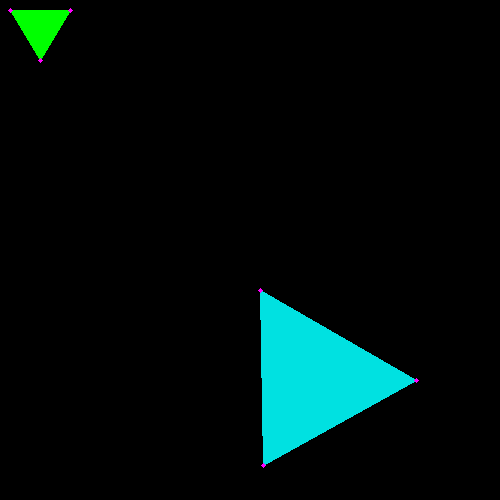

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
import cv2


def draw_triangle(im, triangle, color=(0,255,0)):
    # Normalizar coordenadas homogeneas
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

def scale(vertex, sx, sy):
    matriz = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    Transformacion1 = matriz @ vertex.T # Transpuesto
    return Transformacion1.T

def rotate(vertex, a):
    a = np.deg2rad(a)
    matriz = np.array([[np.cos(a),-np.sin(a),0],[np.sin(a),np.cos(a),0],[0,0,1]])
    Transformacion3 = matriz @ vertex.T
    return Transformacion3.T

def translate(vertex, dx, dy): #vertices X matriles
    matriz = np.array([[1,0, dx],[0,1, dy],[0,0,1]])
    Transformacion2 = matriz @ vertex.T # Transpuesto
    return Transformacion2.T

# image size
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

# Parametros de las transformaciones
# Traslada a centro y realiza escala y rotacion
angle = 30
s = 3
t = 250
# Sistema coordenado de imagenes
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
# escalado
triangle2 = scale(triangle1, s,s)
# Traslación inicial
#triangle3 = translate(triangle2, t, t)
# rotacion
triangle3 = rotate(triangle2, angle)
# Traslación inicial
triangle4 = translate(triangle3, t,t)
# Traslación
triangle5 = translate(triangle4, -40,-30)

# todo
#triangle6 = translate(rotate(scale(translate(triangle1, -40,-30),s,s) ,angle), t,t)
## llamar al trinagulo original
draw_triangle(im, triangle1)
## se cambia el triangulo
draw_triangle(im, triangle4, color=(225,225,0)) #
#draw_triangle(im, scale(translate(triangle1, 80, 80),s,s), color=(225,225,0))

cv2_imshow(im)
